# OBJ: REDUCING the file size by selecting alternative ROWS

In [1]:
import numpy as np
import pandas as pd

In [2]:
# read the OCO2 dataset for 2014-2017

In [3]:
# DATASET: California region only

# SUBSET The dataset from 2014_2020

In [5]:
df_2014_2020= pd.read_csv('combined_2014_2020.csv')

In [4]:
# df_2014_2017= df_2014_2017.drop(columns=['Unnamed: 0','level_0', 'index'])

In [6]:
len(df_2014_2020)

494573

In [9]:
# new dataframe that select alternate rows
df_new= pd.DataFrame()
df_new

""


# SKIPPING the 10 ROWS:

* Selecting the alternate rows
* TESTING purpose only to reudce the size of the file

In [11]:
df_new= df_2014_2020.iloc[::50]
df_new

,Xco2,Latitude,Longitude,quality_flag,DateTime,Year,Month,Day
0,394.46030,32.150340,-124.400430,0,2014-09-10 21:23:44.710,2014,9,10
50,395.31213,33.612590,-124.858410,0,2014-09-10 21:24:11.320,2014,9,10
100,396.51190,34.206480,-118.140410,0,2014-09-12 21:09:39.350,2014,9,12
150,399.02655,34.170800,-118.116220,0,2014-09-12 21:09:50.740,2014,9,12
200,398.55090,34.188670,-118.188210,0,2014-09-12 21:10:09.380,2014,9,12
...,...,...,...,...,...,...,...,...
494350,415.19547,33.679478,-121.150635,0,2020-12-26 21:05:44.380,2020,12,26
494400,415.24620,33.855904,-121.240730,0,2020-12-26 21:05:46.740,2020,12,26
494450,415.47565,33.979656,-121.286415,0,2020-12-26 21:05:49.040,2020,12,26
494500,415.87790,39.484634,-122.239630,0,2020-12-26 21:07:01.040,2020,12,26


In [12]:
df_new['Day'].unique()

array([10, 12, 21, 23,  7, 30,  1,  3,  8, 15, 17, 22, 24, 28, 26,  2,  4,
       11, 13, 25, 27,  5, 14, 19,  9, 18, 31,  6, 20, 29, 16],
      dtype=int64)

In [14]:
len(df_2014_2020),len(df_new), 

(494573, 9892, 17450)

# CASTING the columns to FLOAT16 data type

In [22]:
df_new['Xco2']= df_new['Xco2'].astype('float16')
df_new['Latitude']= df_new['Latitude'].astype('float16')
df_new['Longitude']= df_new['Longitude'].astype('float16');

C:\Users\sagarl\AppData\Local\Temp/ipykernel_4328/3355717311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Xco2']= df_new['Xco2'].astype('float16')
C:\Users\sagarl\AppData\Local\Temp/ipykernel_4328/3355717311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Latitude']= df_new['Latitude'].astype('float16')
C:\Users\sagarl\AppData\Local\Temp/ipykernel_4328/3355717311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [23]:
df_new.head(2)

,Xco2,Latitude,Longitude,quality_flag,DateTime,Year,Month,Day
0,394.50,32.15625,-124.375,0,2014-09-10 21:23:44.710,2014,9,10
50,395.25,33.62500,-124.875,0,2014-09-10 21:24:11.320,2014,9,10


# TOTAL index by Different YEARS

In [24]:
df_new['Year'].value_counts()

2018    1881
2016    1773
2015    1596
2020    1491
2019    1484
2017    1318
2014     349
Name: Year, dtype: int64

# Seaborn to see the scatterplots

In [28]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

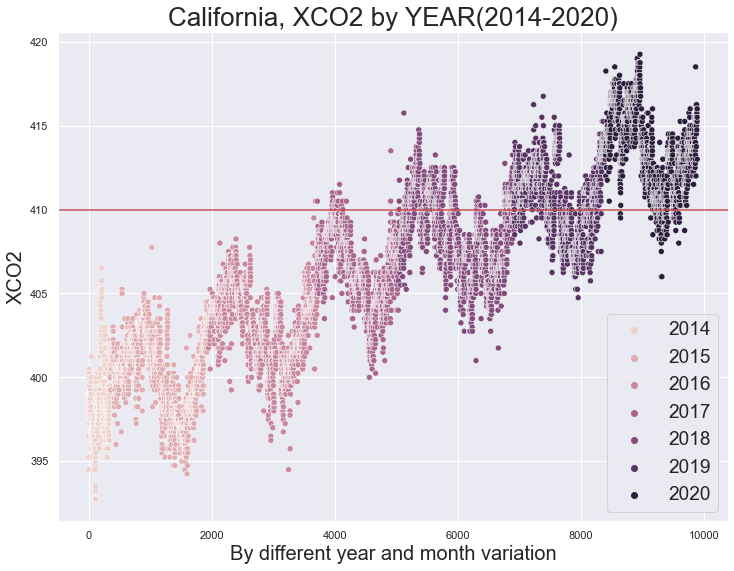

In [40]:
sns.scatterplot(data= df_new, x=np.arange(0, len(df_new)),\
                y= 'Xco2', hue='Year')
plt.title('California, XCO2 by YEAR(2014-2020)', fontsize= 26)
plt.xlabel('By different year and month variation', fontsize =20)
plt.ylabel('XCO2', fontsize = 20)
plt.legend(prop={"size": 19})
plt.axhline(y= 410, c='r')
plt.gcf().set_size_inches(12,9);

In [41]:
df_new.to_csv('combined_2014_2020.csv', index= False)